In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Create of random rows

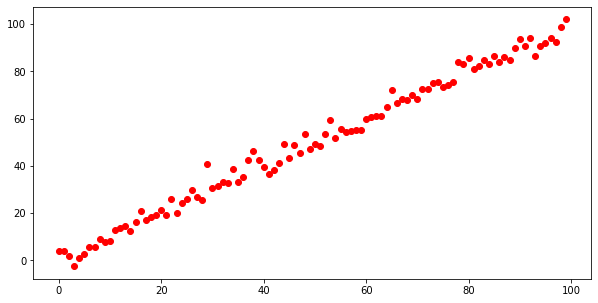

In [2]:
n = 100
sigma = 3
k = 0.5
b = 2

f = np.array(range(n))
y = f + np.random.normal(0, sigma, n)

x = np.array(range(n))
plt.figure(figsize=(10, 5))
#plt.plot(f)
plt.scatter(x, y, c='red', linewidths=1)
plt.show()

In [3]:
data = pd.DataFrame(x, columns=list('X'))
data['Y'] = y
data.head(10)

,X,Y
0,0,3.829209
1,1,3.933401
2,2,1.830612
3,3,-2.515414
4,4,1.186683
5,5,2.851725
6,6,5.550067
7,7,5.679506
8,8,8.912540
9,9,7.989680


# Simple Linear Regression (OLS)

In [4]:
qwe = np.random.rand(len(data)) < 0.8
train = data[qwe]
test = data[~qwe]

In [5]:
class SLR(): 
    #Метод наименьших квадратов
    def fit(self, data, x, y_true):
        param = [np.sum(x), np.sum(y_true), np.sum(x**2), np.sum(x*y_true)] #Подсчёт сумм для составления матрицы
        matrix = [[param[2], param[0]], 
                  [param[0], len(data.index)]] #Матрица сумм
        matrix_free = [param[3], param[1]] #Матрица свободных членов
        inv_matrix_free = np.linalg.inv(matrix) #Обратная матрица сумм
        global coeff
        coeff = np.matmul(inv_matrix_free, matrix_free) #Произведение - получаем коэффициенты k, b
        
    def getCoef(self):
        return coeff[0]
    
    def getInter(self):
        return coeff[1]
    
    def predict(self, x):
        return x*coeff[0] + coeff[1]

In [6]:
#SKLearn Linear Regression
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(data[['X']])
train_y = np.asanyarray(data[['Y']])
model.fit(train_x, train_y)
print('coef', model.coef_)
print('intercept', model.intercept_)
print('score', model.score(train_x, train_y))

coef [[0.9912578]]
intercept [0.8084598]
score 0.9891086106740519


In [7]:
#My Liner Regression
ols = SLR()
ols.fit(data, data.X, data.Y)
print('coef', ols.getCoef())
print('intercept', ols.getInter())

coef 0.9912577978593369
intercept 0.8084597990929296


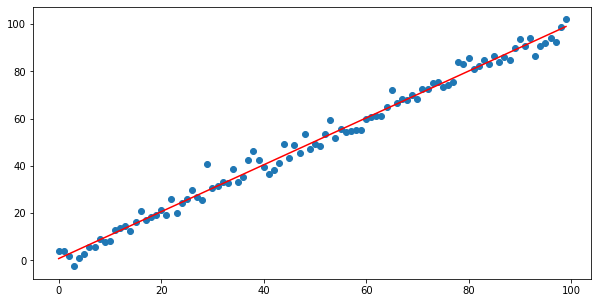

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(data.X, data.Y)
plt.plot(data.X, data.X*ols.getCoef() + ols.getInter(), '-r')
plt.show()

In [9]:
print('SKLearn', model.predict([[5]]))
print('SLR', ols.predict(5))

SKLearn [[5.76474879]]
SLR 5.764748788389614


# MSE

In [10]:
#МОЙ НАБОРА ДАННЫХ
n = 100
sigma = 3
k = 0.5
b = 2

f = np.array(range(n))
z = f + np.random.normal(0, sigma, n)
x = np.array(np.random.rand(n)) + 4
y = np.array(np.random.rand(n))
data = pd.DataFrame(x, columns=list('X'))
data['Y'] = y
data['Z'] = z
data.head(10)

,X,Y,Z
0,4.334941,0.332260,6.688606
1,4.263939,0.586201,-2.955024
2,4.051957,0.012022,0.978857
3,4.374804,0.800755,0.998347
4,4.052502,0.286055,4.018694
5,4.826811,0.887998,3.279211
6,4.622843,0.929499,3.009251
7,4.935713,0.217025,11.565683
8,4.771428,0.999318,11.502619
9,4.974458,0.012981,5.921462


In [11]:
#ДАННЫЕ ИЗ ДАТАСЕТА
from sklearn.datasets import load_boston
dataset = load_boston()
dataset = load_boston()
data2 = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
data2['PRICE'] = dataset.target
data = pd.DataFrame({'X1': data2['RM'], 'X2': data2['PTRATIO'], 'Z': data2['PRICE']})

data.head()

,X1,X2,Z
0,6.575,15.3,24.0
1,6.421,17.8,21.6
2,7.185,17.8,34.7
3,6.998,18.7,33.4
4,7.147,18.7,36.2


In [135]:
w = []
b = 0
n = len(data.index)
def mse(z_, z):
    return ((z_ - z)**2).mean()

def grad_descent(x1, x2, z, lr):
    global w, b
    w = []
    b = np.array(np.random.rand(1)) #bias случайное
    losses = []
    
    for i in range(len(data.index)):
        w.append([np.random.rand(1), np.random.rand(1)]) #Заполняем w-вектор случайными числами
        
    for i in range(n): #modify to while
        z_ = predict(x1[i], x2[i], i, w[i][0], w[i][1], b)
        losses.append(mse(z_, z))
        
        w_grad = np.zeros_like(w)
        b_grad = 0
        for x1_, x2_, z_pred, z_true in zip(x1, x2, z_, z):
            w_grad[i][0] = w_grad[i][0] + 2 * (z_pred - z_true) * x1_ #Находим сумму производных
            w_grad[i][1] = w_grad[i][1] + 2 * (z_pred - z_true) * x2_
            b_grad = 2 * (z_pred - z_true) 
                
        w[i][0] -=- lr * w_grad[i][0] #Делаем шаг в нужную сторону, основываясь на градиент
        w[i][1] -=lr * w_grad[i][1]
        b -= lr * b_grad
    return losses

def predict(x1, x2, i, w1, w2, b):
    pred = 0
    
    for i in range(2):
        pred += w[i][0]*x1 + w[i][1]*x2
        
    pred += b
    
    return pred

In [136]:
loss = grad_descent(data.X, data.Y, data.Z, 0.0001)
loss

[2846.6859772173525,
 2834.4676134798583,
 2880.868675059181,
 2790.24047381345,
 2845.2899832143066,
 2852.060224349868,
 2859.6662164144495,
 2814.6798614859076,
 2767.1319443558737,
 2865.6822348317205,
 2765.2971596176644,
 2792.4162046134097,
 2880.1923725661236,
 2820.0636251376186,
 2854.5714818772763,
 2777.3803887709564,
 2822.0196008291464,
 2853.870404190575,
 2819.3959008912457,
 2835.3093719911126,
 2876.02525035104,
 2798.867081464137,
 2859.3425351683895,
 2794.8553117034817,
 2818.075418852348,
 2851.4405535046612,
 2841.867133403407,
 2850.2247450630002,
 2788.810358178818,
 2822.591767473387,
 2840.5314789514064,
 2822.4058137357606,
 2839.3946364479234,
 2841.2179064569814,
 2795.8500924486875,
 2876.4231627632103,
 2819.408149821271,
 2835.931636204659,
 2826.859518495024,
 2786.5629349665123,
 2828.315064984423,
 2879.0440678222,
 2826.4481127425374,
 2791.6382929213123,
 2832.7508910133115,
 2828.7136664794684,
 2787.439430520686,
 2847.904024383035,
 2823.5038128

In [81]:
#МОЙ НАБОРА ДАННЫХ
n = 100
sigma = 3
k = 0.5
b = 2

f = np.array(range(n))
z = f + np.random.normal(0, sigma, n)
x = np.array(np.random.rand(n)) + 4
y = np.array(np.random.rand(n))
data = pd.DataFrame(x, columns=list('X'))
data['Y'] = y
data['Z'] = z

In [177]:
def mse(y_, y):
    sum = 0;
    for i in range(len(y)):
        sum += (y_[i] - y[i])**2
    return sum/len(y)

def gradient_des(dataX, dataY, dataZ, count, lr):
    dataZ = np.matrix(dataZ).T
    #Создаем матрицу вида [1, x11, x12], [1, x21, x22] .. [1, xN1, xN2]
    temp = np.ones((count))
    X = np.matrix((temp, np.array(dataX), np.array(dataY))).T
    #Создаем W-стобец вида [w0, w1, w2] и вектор ошибок
    W = np.matrix([np.random.rand(1), np.random.rand(1), np.random.rand(1)]) #3x1
    losses = []
    np.array(losses)
    dfdw = np.matrix([np.random.rand(1), np.random.rand(1), np.random.rand(1)])
    for i in range(count):
        Y = X*W
        losses.append(mse(dataZ, Y))
        #for num in range(count):
        #    dfdw[0] = 2*(dataZ[num] - Y[num])#dataZ[_] - Y[_] 100x1
        #    dfdw[1] = 2*(dataZ[num] - Y[num])*X[i, 1]
        #    dfdw[2] = 2*(dataZ[num] - Y[num])*X[i, 2]
        dfdw += 2*X.T*(dataZ - Y)
        #print('curr', dfdw)
        W -= lr * dfdw
    return np.array(losses)

In [176]:
losses = gradient_des(data.X, data.Y, np.array(data.Z), 100, 0.001)
losses = losses.reshape(-1,)
losses

matrix([[3.46994868e+82, 1.57785658e+83, 1.84275229e+82]])

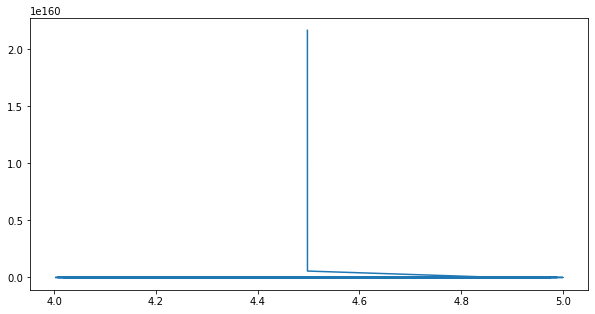

In [171]:
plt.figure(figsize=(10, 5))
plt.plot(data.X, losses)
plt.show()